Task 3 : Sales prediction using python

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("/content/advertising.csv")

In [3]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
df.shape

(200, 4)

In [31]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [37]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [40]:
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

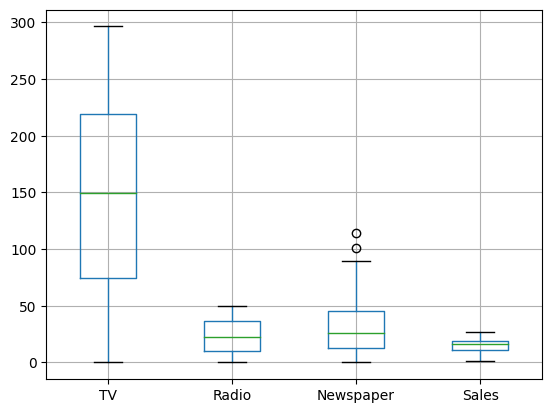

In [39]:
df.boxplot()
plt.show()

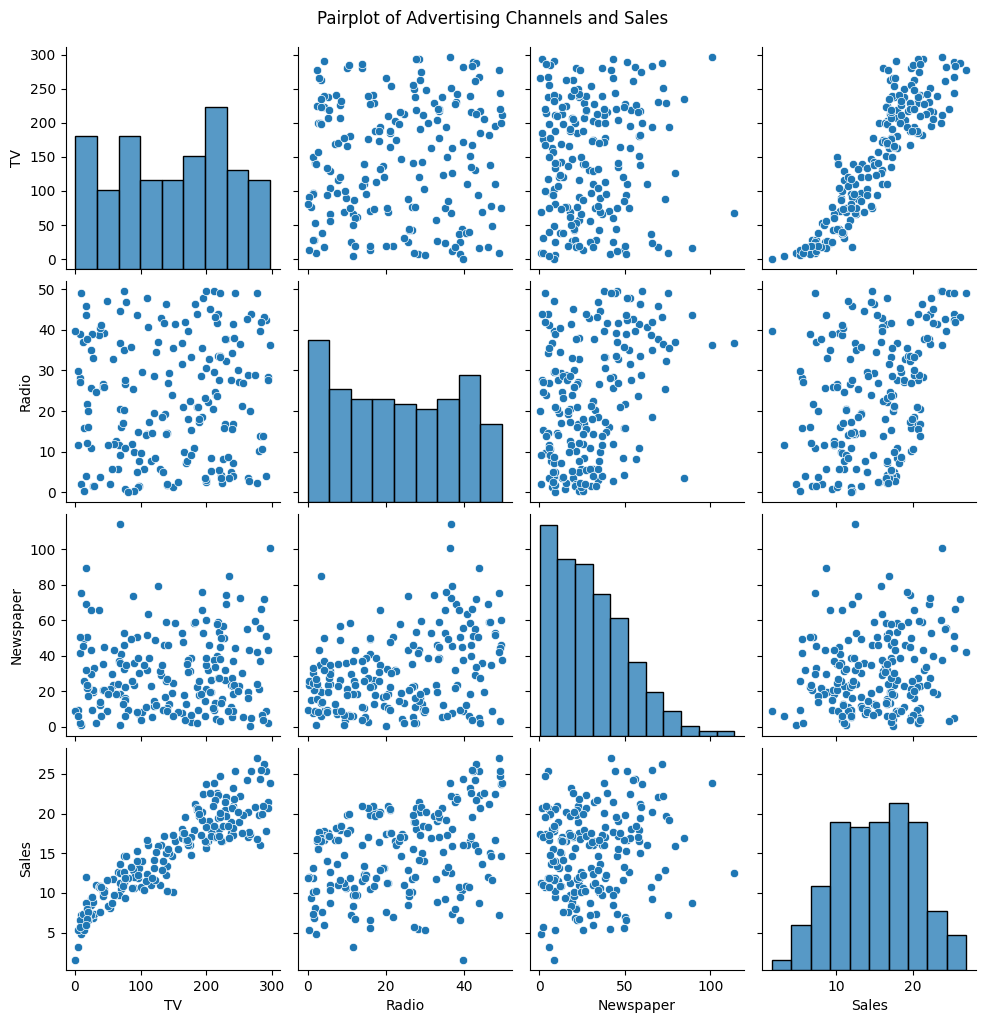

In [6]:
# Creating a pairplot for all relationships in the DataFrame
sns.pairplot(df)
plt.suptitle('Pairplot of Advertising Channels and Sales', y=1.02)
plt.show()


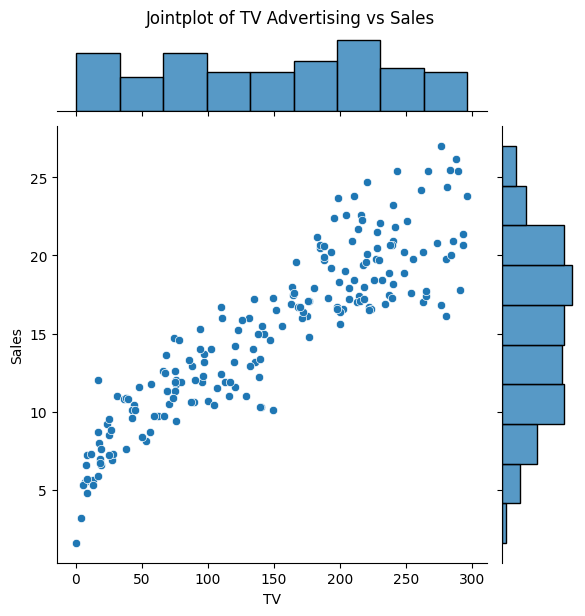

In [22]:
# Creating joint plots for each pair of advertising channels and sales
sns.jointplot(data=df, x='TV', y='Sales').fig.suptitle('Jointplot of TV Advertising vs Sales', y=1.02)
plt.show()


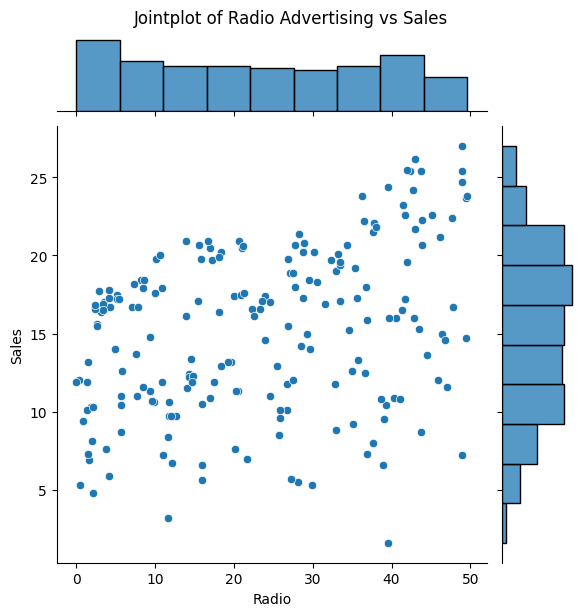

In [21]:
sns.jointplot(data=df, x='Radio', y='Sales').fig.suptitle('Jointplot of Radio Advertising vs Sales', y=1.02)
plt.show()

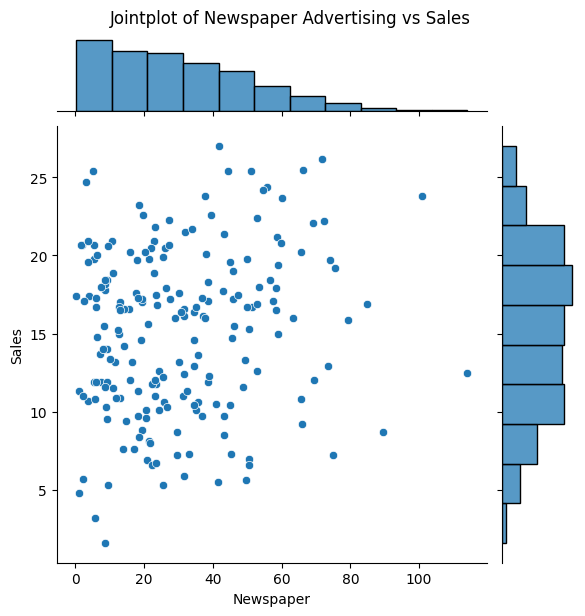

In [20]:
sns.jointplot(data=df, x='Newspaper', y='Sales').fig.suptitle('Jointplot of Newspaper Advertising vs Sales', y=1.02)
plt.show()

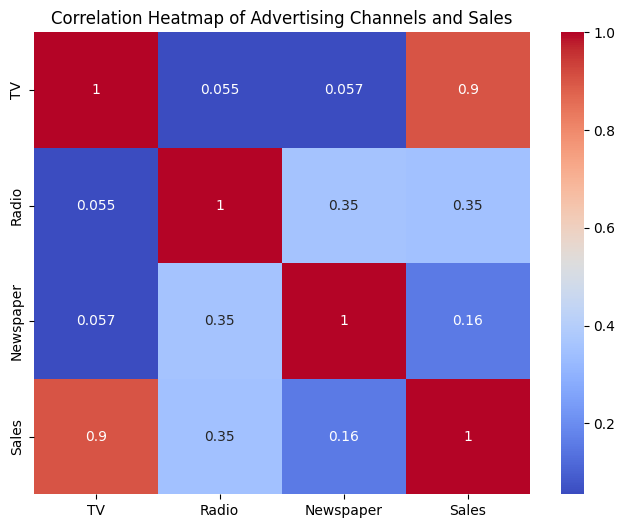

In [25]:
# Creating a heatmap to show the correlation between the variables
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Advertising Channels and Sales')
plt.show()


In [28]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [34]:
df.duplicated().sum()

0

In [36]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [62]:
x=df.iloc[0:200,0:3]
y=df.iloc[0:200,3]

In [59]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [60]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.3,random_state=10)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)
y_pre=model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pre)

0.9032402609859365